In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qtensor.states as states 
import qtensor.operators as ops
from qtensor.simulation.finiteTDVP import tdvp, right_mpo_contractions, gs_evolve
import qtensor.simulation.finiteTDVP as sim
import qtensor.thermofield as thf 

Basic state

In [36]:
a = np.random.rand(2,3,3) + 1j * np.random.rand(2,3,3)
b = np.random.rand(2,3,3) + 1j * np.random.rand(2,3,3)

psi = states.mps([a, a, b, a, b])
psi.right_canonical()

H = ops.tilted_ising(N=5)

H_spin_up = ops.tilted_ising(J=0, h=1, g=0, N=5)


Ground state evolve

In [37]:
psi = gs_evolve(psi, H_spin_up, 1000, 100)

Intial energy: (0.3688268833390648-1.8839358890344946e-16j)
Initiating TDVP
TDVP finished!
Final energy: (-4.999999999999678-2.914334599291558e-16j)


Thermofield stuff

In [2]:
N = 8
D = 8
H_usual = ops.tilted_ising(N=N)
beta = 1000
H_th = thf.thermofield_hamiltonian(H_usual)


Intial energy: (0.020503272680248055+9.899102491720557e-17j)
Initiating TDVP
TDVP finished!
Final energy: (-7.9999961903288215+6.627345557524767e-16j)
Initiating TDVP
TDVP finished!
Energy at finite temperature: -9.590983998255652


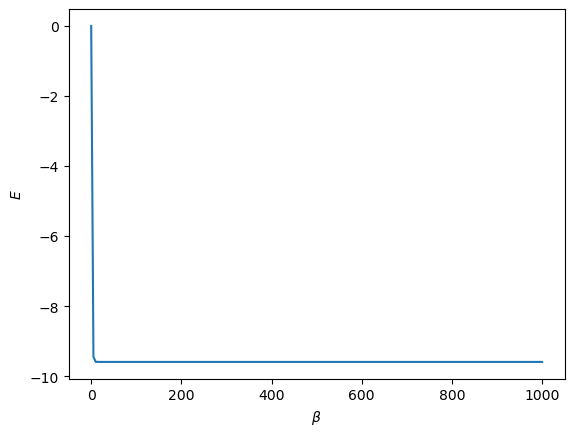

In [3]:
beta_psi, times, energies = thf.finite_T_thermofield(beta, N, D, H_th, steps=200)

In [4]:
# compare this to the groundstate energy
randpsi = states.random_mps(N, 2, D)
gs_evolve(randpsi, H_usual)

Intial energy: (-4.162048062445335-4.426325008087262e-16j)
Initiating TDVP
TDVP finished!
Final energy: (-9.590983998497517+3.469446951953614e-16j)


In [ ]:
psi = sim.inf_T_thermofield_variational(10, 8)

Intial energy: (-0.08589948685700408+1.4023086957546302e-16j)
Initiating TDVP
TDVP finished!
Final energy: (-9.99999261204489+1.231239316631093e-18j)


In [3]:
states.partite_entropy(psi, 3)

copied


7.387955291037075e-07